Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [195]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [196]:
Npx = 3 # Number of plaquette in each dimension
Npy = 3
model = site.SitesPBC(Npx, Npy)

In [197]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print("Nxsites ", model.Nxsites)
print("Nyrows ", model.Nyrows)
print(model.partition)
print(model.partition[0])

Number of sites: 24
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Nxsites  6
Nyrows  4
['A' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B'
 'B' 'A' 'B' 'A' 'B' 'A']
A


In [198]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]]


In [199]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(5, 0)


In [200]:
9 % 2

1

In [201]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bond = model.get_diagonalbonds()
anyon_bonds, px, py = model.get_anyonbonds()

In [180]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bond: ", np.array(diagonal_bond))
print("anyon_bonds: ", np.array(anyon_bonds))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 7  8]
 [ 9 10]
 [11  6]
 [12 13]
 [14 15]
 [16 17]
 [19 20]
 [21 22]
 [23 18]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 0  5]
 [ 7  6]
 [ 9  8]
 [11 10]
 [14 13]
 [16 15]
 [12 17]
 [19 18]
 [21 20]
 [23 22]]
zz_bond:  [[ 0  6]
 [ 2  8]
 [ 4 10]
 [ 7 13]
 [ 9 15]
 [11 17]
 [12 18]
 [14 20]
 [16 22]]
diagonal_bond:  [[ 0  8]
 [ 2 10]
 [ 4  6]
 [ 7 15]
 [ 9 17]
 [11 13]
 [12 20]
 [14 22]
 [16 18]]
anyon_bonds:  [[16 17]]


In [202]:
def plot_honeycomb(model, highlight_idxidy=None, highlight_color='orange', plot_anyon_bonds=False):
    coords = model.get_coordinates()
    xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
    
    plt.figure(figsize=(25, 25))
    # Plot sites
    plt.scatter(coords[:, 0], coords[:, 1], color='k', zorder=3)

    # Plot bonds
    for bond in xx_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'r-', label='xx' if bond == xx_bondlist[0] else "", lw=2)
    for bond in yy_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'b-', label='yy' if bond == yy_bondlist[0] else "", lw=2)
    for bond in zz_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'g-', label='zz' if bond == zz_bondlist[0] else "", lw=2)

    # Plot anyon bonds if requested
    if plot_anyon_bonds:
        anyon_bonds, px, py = model.get_anyonbonds()
        for i, j in anyon_bonds:
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]],
                     color='magenta', lw=5, label='anyon bond' if (i, j) == anyon_bonds[0] else "", zorder=4)

    highlight_idxidy = (px, py)
    # Highlight a specific site if requested
    if highlight_idxidy is not None:
        idx, idy = highlight_idxidy
        site_id = model.idxidy_to_id(idx, idy)
        plt.scatter(coords[site_id, 0], coords[site_id, 1], color=highlight_color, s=300, zorder=5, label='highlighted site')
    
    plt.axis('equal')
    plt.axis('off')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

id 0 idx 0 idy 0
sublattice A
x 0.0
y -0.0
x 0.0 y -0.0
id 1 idx 1 idy 0
sublattice B
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
sublattice A
x 1.7320508075688772
y -0.0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
sublattice B
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
sublattice A
x 3.4641016151377544
y -0.0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
sublattice B
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
sublattice A
x 5.196152422706632
y -0.0
x 5.196152422706632 y -0.0
id 7 idx 7 idy 0
sublattice B
x 6.06217782649107 y 0.5
id 8 idx 8 idy 0
sublattice A
x 6.928203230275509
y -0.0
x 6.928203230275509 y -0.0
id 9 idx 9 idy 0
sublattice B
x 7.794228634059947 y 0.5
id 10 idx 0 idy 1
sublattice B
x 0.0 y -1.0
id 11 idx 1 idy 1
sublattice A
x 0.8660254037844386
y -1.5
x 0.8660254037844386 y -1.5
id 12 idx 2 idy 1
sublattice B
x 1.7320508075688772 y -1.0
id 13 idx 3 idy 1
sublattice A
x 2.598076211353316
y -1.5
x 2.598076211353316 y -1.5
id 14 idx 4 idy 1
sublattice B
x 3.46410161513775

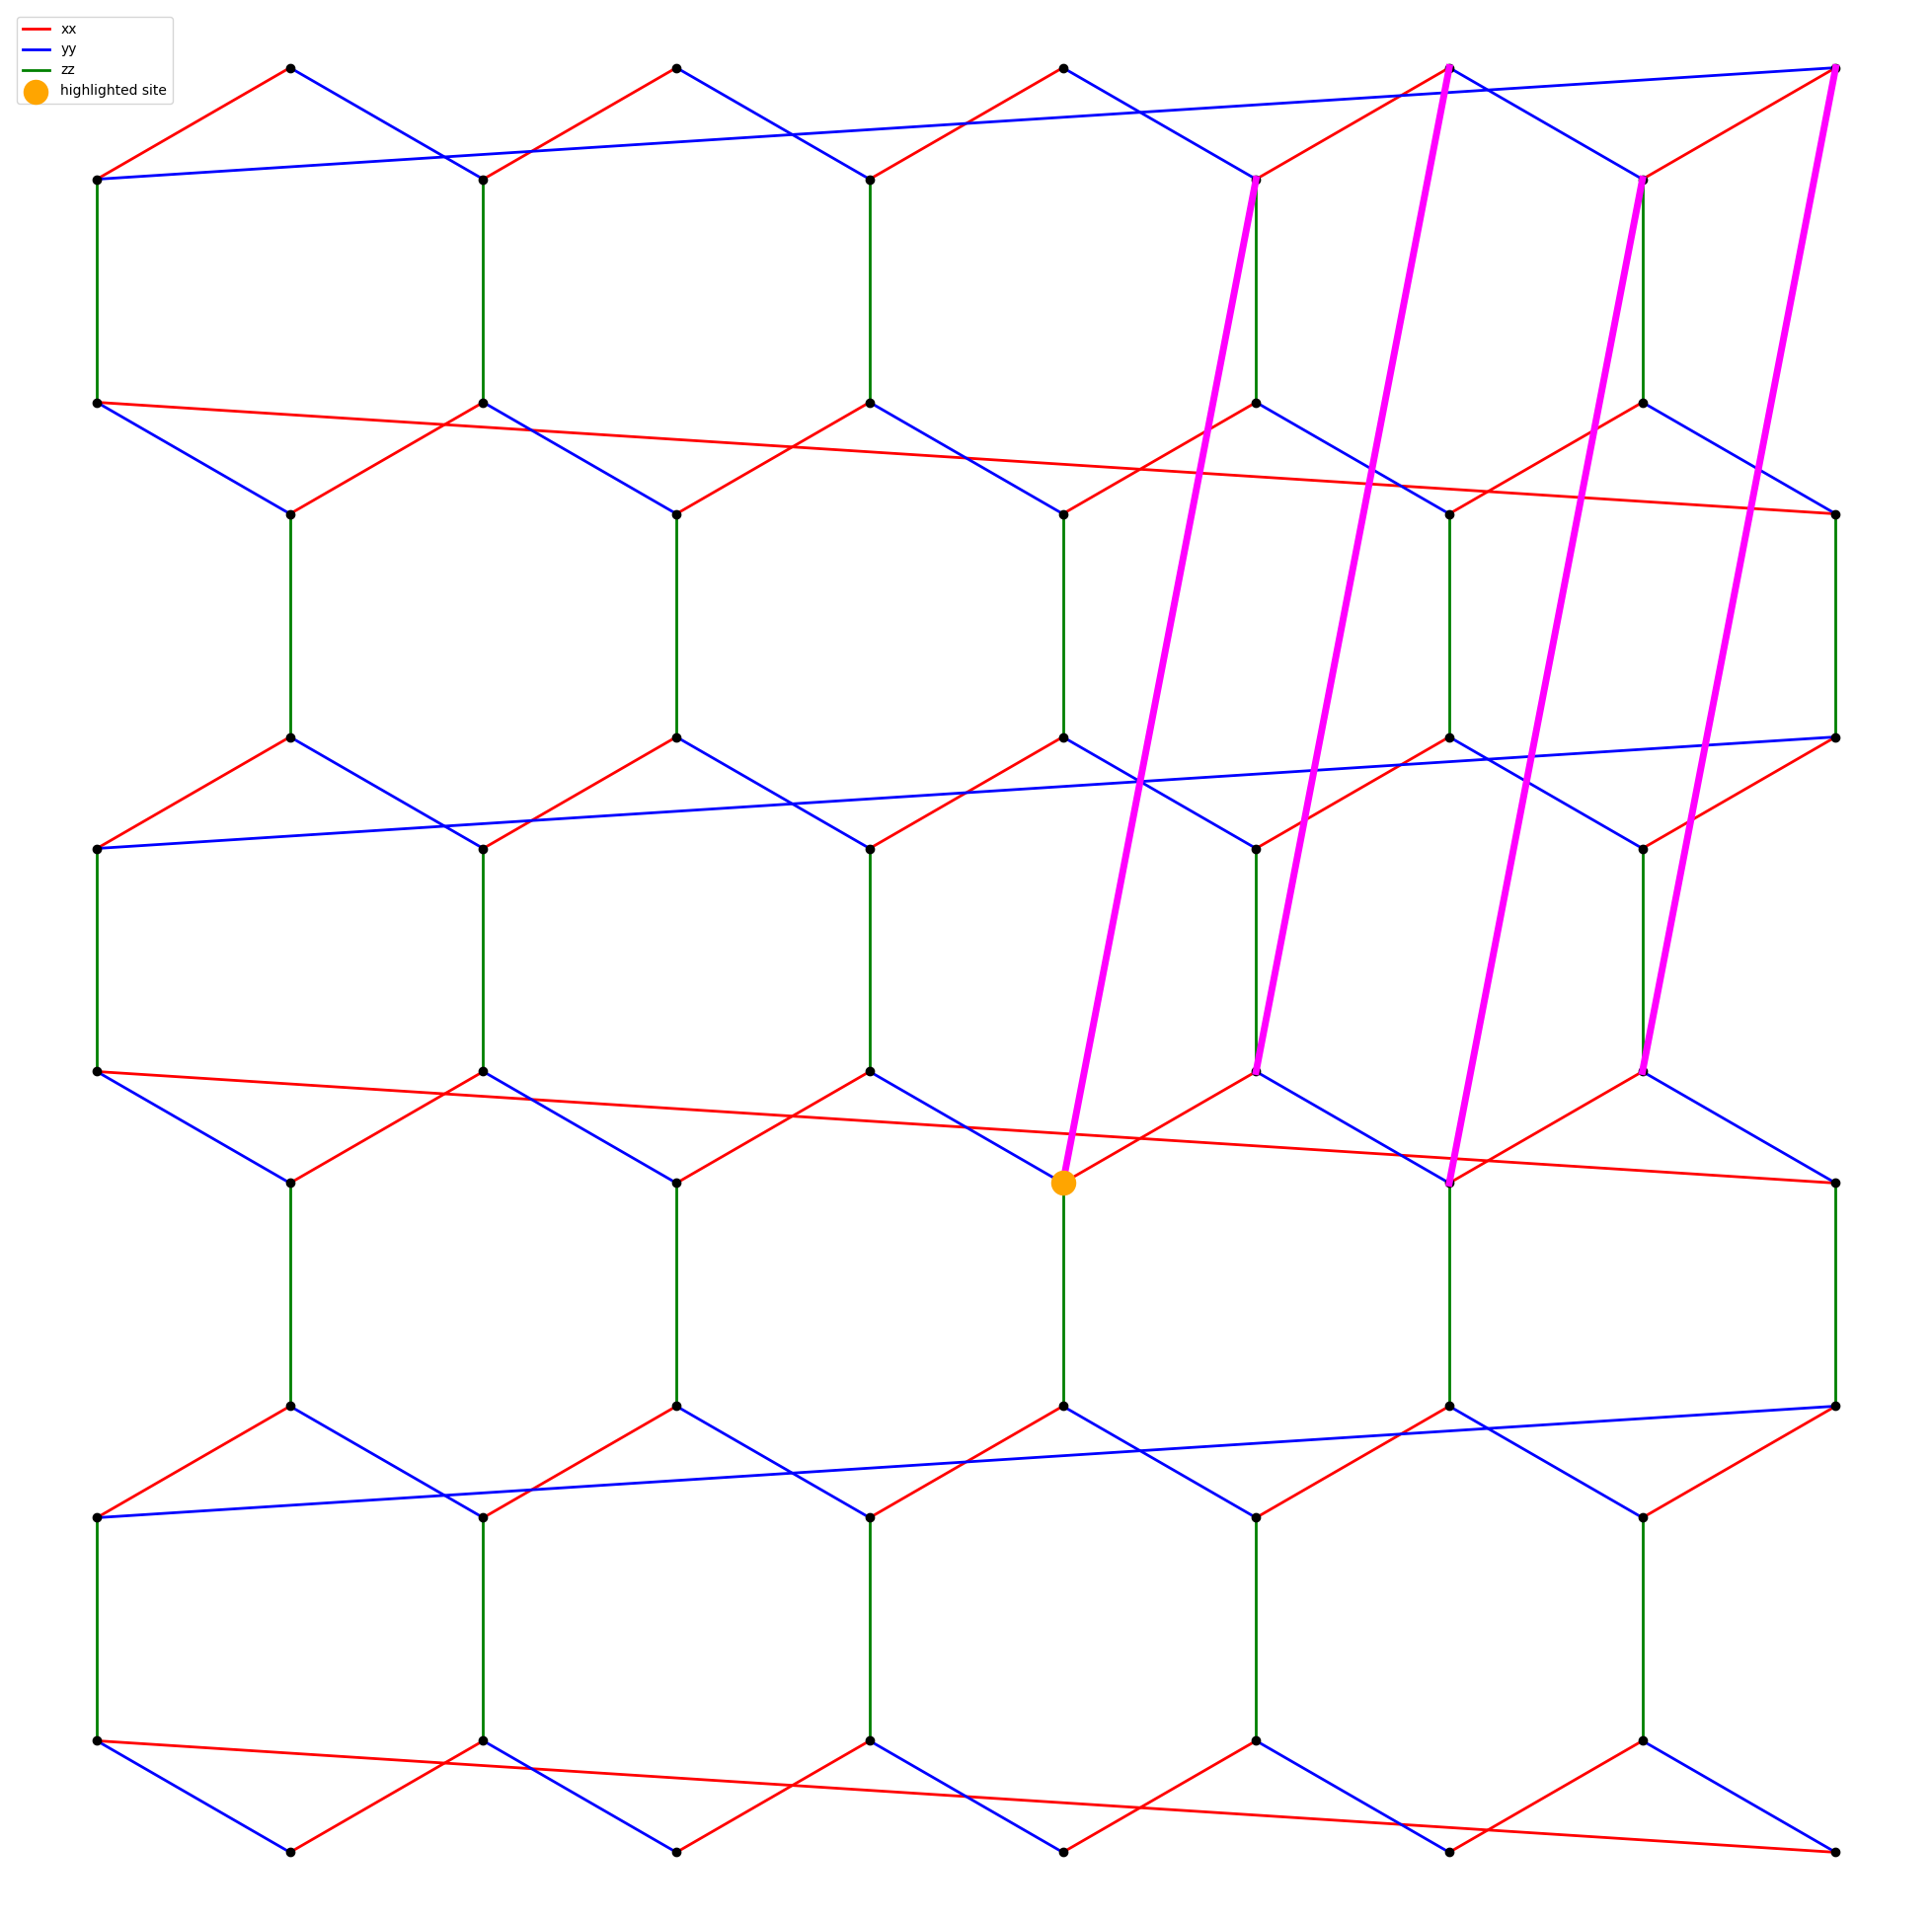

anyon bonds:  ([[np.int64(35), np.int64(6)], [np.int64(36), np.int64(7)], [np.int64(37), np.int64(8)], [np.int64(38), np.int64(9)]], np.int64(5), np.int64(3))


In [203]:
modell = site.SitesPBC(Npx = 5, Npy = 5)
plot_honeycomb(modell, plot_anyon_bonds= True)
print("anyon bonds: ", modell.get_anyonbonds())

In [184]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

id 0 idx 0 idy 0
sublattice A
x 0.0
y -0.0
x 0.0 y -0.0
id 1 idx 1 idy 0
sublattice B
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
sublattice A
x 1.7320508075688772
y -0.0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
sublattice B
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
sublattice A
x 3.4641016151377544
y -0.0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
sublattice B
x 4.330127018922193 y 0.5
id 6 idx 0 idy 1
sublattice B
x 0.0 y -1.0
id 7 idx 1 idy 1
sublattice A
x 0.8660254037844386
y -1.5
x 0.8660254037844386 y -1.5
id 8 idx 2 idy 1
sublattice B
x 1.7320508075688772 y -1.0
id 9 idx 3 idy 1
sublattice A
x 2.598076211353316
y -1.5
x 2.598076211353316 y -1.5
id 10 idx 4 idy 1
sublattice B
x 3.4641016151377544 y -1.0
id 11 idx 5 idy 1
sublattice A
x 4.330127018922193
y -1.5
x 4.330127018922193 y -1.5
id 12 idx 0 idy 2
sublattice A
x 0.0
y -3.0
x 0.0 y -3.0
id 13 idx 1 idy 2
sublattice B
x 0.8660254037844386 y -2.5
id 14 idx 2 idy 2
sublattice A
x 1.7320508075688772
y -3.0
x 1.732050807

Let us try to do a 3D plot with cyclindric coordinates (not working)

In [126]:
# Place this in your notebook or script
from mpl_toolkits.mplot3d import Axes3D

def plot_honeycomb_cylinder(model, R=5):
    coords = model.get_coordinates_cylindric(R=R)
    xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Plot sites
    ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='k', s=10, zorder=3)
    # Plot bonds
    for bond, color in zip([xx_bondlist, yy_bondlist, zz_bondlist], ['r', 'b', 'g']):
        for i, j in bond:
            ax.plot([coords[i, 0], coords[j, 0]],
                    [coords[i, 1], coords[j, 1]],
                    [coords[i, 2], coords[j, 2]],
                    color=color, lw=2)
    ax.set_axis_off()
    plt.show()

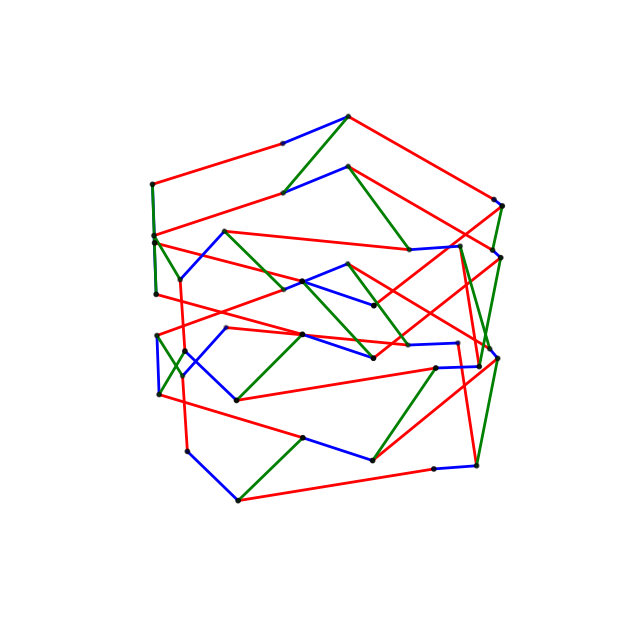

In [127]:
modell = site.SitesPBC(Npx=4, Npy=4)
plot_honeycomb_cylinder(modell, R=5)

### Fermionic representation of many wonderful things

In [185]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [186]:
model = site.SitesPBC(Npx=5, Npy=5)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

60


In [188]:
H0_xmaj = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0)
H0_ymaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0)
H0_zmaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0)

H0_x = fgs.Hamiltonian_dirac(H0_xmaj)
H0_y = fgs.Hamiltonian_dirac(H0_ymaj)
H0_z = fgs.Hamiltonian_dirac(H0_zmaj)

# dfx = pd.DataFrame(H0_x)
# dfy = pd.DataFrame(H0_y)
# dfz = pd.DataFrame(H0_z)

# print("Hamiltonian H0_x:\n", dfx.round(2))
# print("Hamiltonian H0_y:\n", dfy.round(2))
# print("Hamiltonian H0_z:\n", dfz.round(2))

Adding xx bonds with Jxx = 1.0
Adding yy bonds with Jyy = 1.0
Adding zz bonds with Jzz = 1.0


In [189]:
He_xmaj = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0, type='Anyon')
He_ymaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0, type='Anyon')
He_zmaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0, type='Anyon')

He_x = fgs.Hamiltonian_dirac(He_xmaj)
He_y = fgs.Hamiltonian_dirac(He_ymaj)
He_z = fgs.Hamiltonian_dirac(He_zmaj)

# dfex = pd.DataFrame(He_x)
# dfey = pd.DataFrame(He_y)
# dfez = pd.DataFrame(He_z)

# print("Hamiltonian He_x:\n", dfex.round(2))
# print("Hamiltonian He_y:\n", dfey.round(2))
# print("Hamiltonian He_z:\n", dfez.round(2))

Adding xx bonds with Jxx = 1.0
type = Anyon!
Adding yy bonds with Jyy = 1.0
type = Anyon!
Adding zz bonds with Jzz = 1.0
type = Anyon!


In [190]:
#check if elements He[20,21] He[21,22] He[22,23] and transpose are with of opposite sign
#with respect to H0
for i in [20,21,22]:
    print(i)
    print(H0_xmaj[i,i+1], He_xmaj[i,i+1])
    print(H0_xmaj[i+1,i], He_xmaj[i+1,i])
    print()
    print(H0_ymaj[i,i+1], He_ymaj[i,i+1])
    print(H0_ymaj[i+1,i], He_ymaj[i+1,i])
    print()
    print(H0_zmaj[i,i+1], He_zmaj[i,i+1])
    print(H0_zmaj[i+1,i], He_zmaj[i+1,i])
    print()

#WORKS

20
0.5j 0.5j
-0.5j -0.5j

0j 0j
0j 0j

0j 0j
0j 0j

21
0j 0j
0j 0j

-0.5j -0.5j
0.5j 0.5j

0j 0j
0j 0j

22
0.5j 0.5j
-0.5j -0.5j

0j 0j
0j 0j

0j 0j
0j 0j



# Topological Order Parameter

In [ ]:
loop = []

We define $\tilde{U}(T) = exp(2i \frac{T}{3}H_{0x})exp(2i \frac{T}{3}H_{0y})exp(2i \frac{T}{3}H_{0z})$

In [191]:
from scipy.linalg import expm

T = 1.

Utilde = expm(2*1j*T*H0_x/3.)*expm(2*1j*T*H0_y/3.)*expm(2*1j*T*H0_z/3.)

In [192]:
eigvals, eigvecs = np.linalg.eig(Utilde)

In [193]:
print(eigvals)

[2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j
 2.67315964+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 2.67315964+0.j
 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j]
